In [1]:
%load_ext autoreload
%autoreload 2


>> Import required Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import datetime
import seaborn as sns
from scipy.stats import chi2_contingency, beta
import plotly.graph_objs as go


>> Importing required modules

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plot import Plot

>> Initialize plot class

In [4]:
pl = Plot()

>> Ignore warnings

In [5]:
import warnings
warnings.filterwarnings('ignore')


>> Loading the Data

In [6]:
df = pd.read_csv('../data/AdSmartABdata.csv')

>> #### Explore the data and identify the features

In [7]:
# Data overview
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [18]:
# data distribution
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [19]:
#data properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [78]:
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

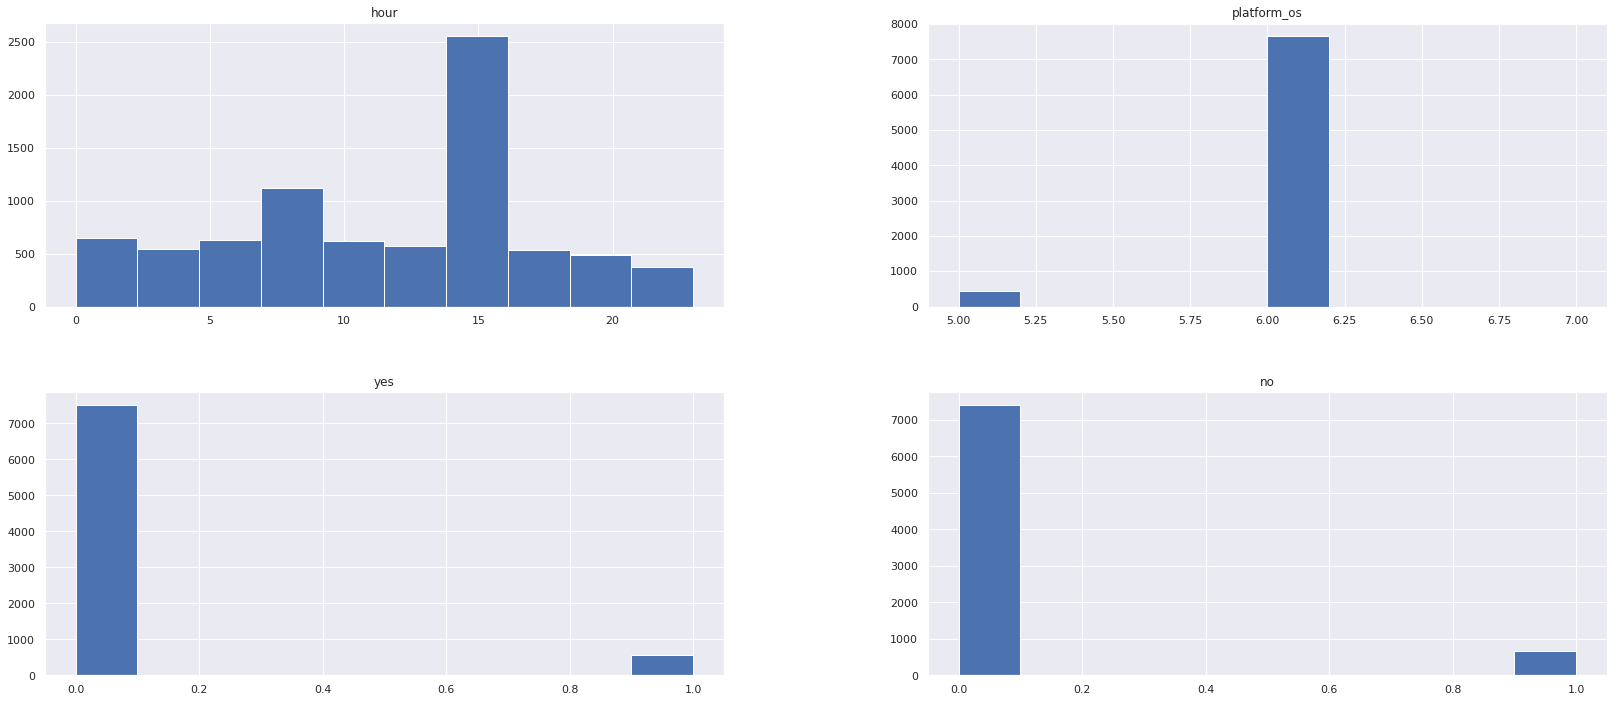

In [77]:
# Visualize the data (overall distribution)
df.hist(bins=10, figsize=(28,12))
plt.show()

In [22]:
# Number of people who have completed the survey with a yes and no
print(df[(df['experiment'] == 'exposed') & (df['yes'] == 1)].shape[0])
print(df[(df['experiment'] == 'exposed') & (df['no'] == 1)].shape[0])

308
349


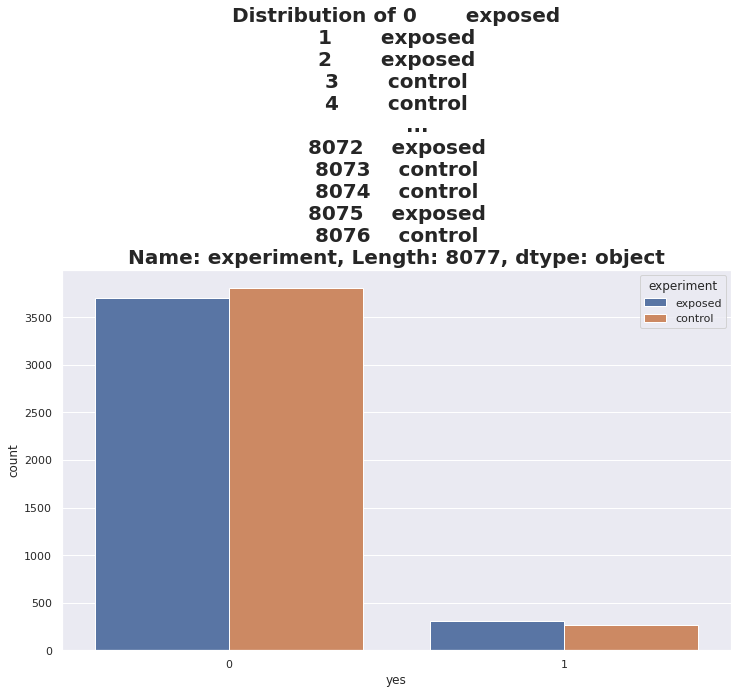

In [92]:
pl.plot_count(df.yes, df.experiment)

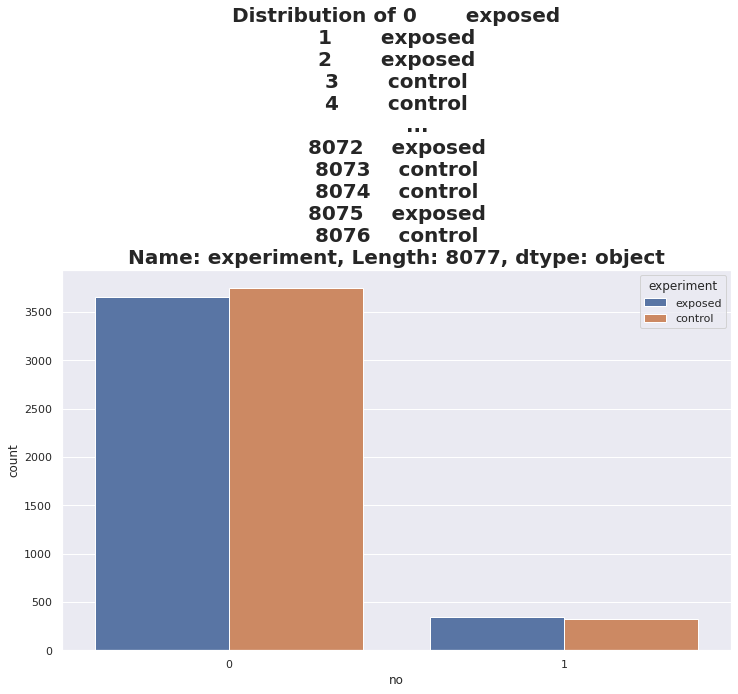

In [91]:
pl.plot_count(df.no, df.experiment)

In [76]:
start_date = datetime.datetime.strptime(df['date'].min(), '%Y-%m-%d')
end_date = datetime.datetime.strptime(df['date'].max(), '%Y-%m-%d')
date_duration = (end_date - start_date).days


print(f"Number of unique users in the experiement: {df['auction_id'].nunique()}")
print(f"Data collected for {date_duration} days")
print(f"Percentage of users in control group: {round(df[df['experiment'] == 'control']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}%")
print(f"Percentage of users in exposed group: {round(df[df['experiment'] == 'exposed']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}%")
# print(f"Percentage of users who have clicked on the link: {round(df['yes'].sum()/df['yes'].count()*100, 2)}%")



Number of unique users in the experiement: 8077
Data collected for 7 days
Percentage of users in control group: 50.4%
Percentage of users in exposed group: 49.6%


In [20]:
# Divide into participated and non-participated
participated_df = df[~((df['yes']== 0) & (df['no']== 0))]
nparticipated_df =  df[(df['yes']== 0) & (df['no']== 0)]

In [28]:
print(f"{participated_df.shape[0]} participants participated")
print(f"{nparticipated_df.shape[0]} participants did not participate")

1243 participants participated
6834 participants did not participate


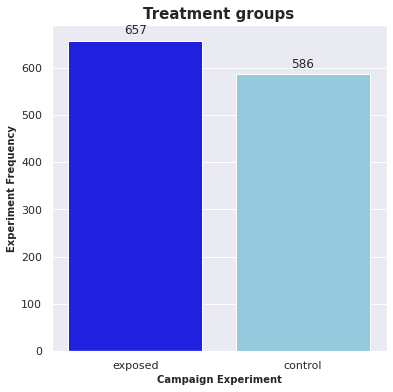

In [93]:
#seaborn countplot to show the ad campaign experiment
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["blue", "skyblue"], data=participated_df)

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Treatment groups of participated Users", 
        "Campaign Experiment", "Experiment Frequency", 15, 10, "bold")

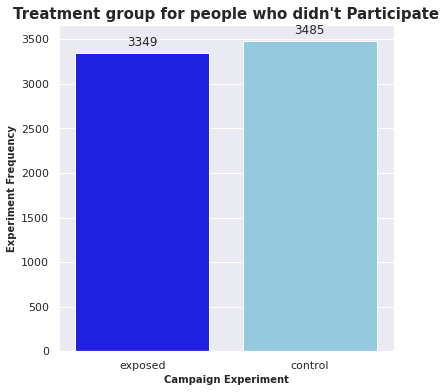

In [94]:
#seaborn countplot to show the ad campaign experiment
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["blue", "skyblue"], data=nparticipated_df)
#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Treatment group for people who didn't Participate", 
        "Campaign Experiment", "Experiment Frequency", 15, 10, "bold")

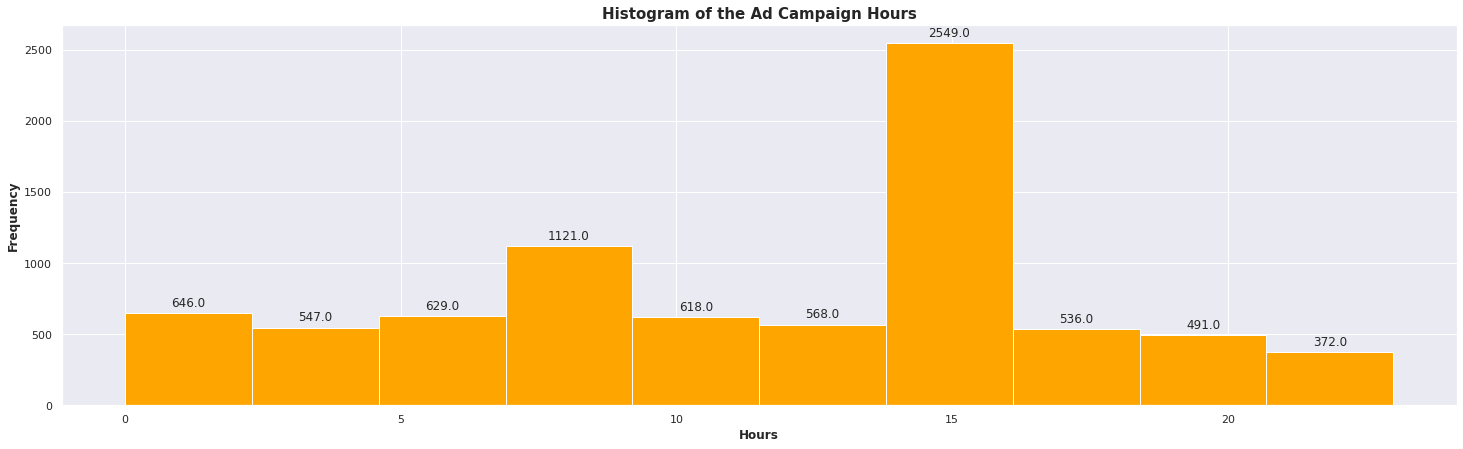

In [95]:
# time distribution for the AD campaign
hour_plot = df.hour.plot(kind='hist', color='orange', figsize=(25,7))

#getting the values of the data
pl.get_value(hour_plot)

#set the figure parameters
pl.fig_att(hour_plot, 'Histogram of the Ad Campaign Hours', 
        'Hours', 'Frequency', 15, 12, 'bold')

>> ##### Time distribution for the AD campaign for those who did not participate


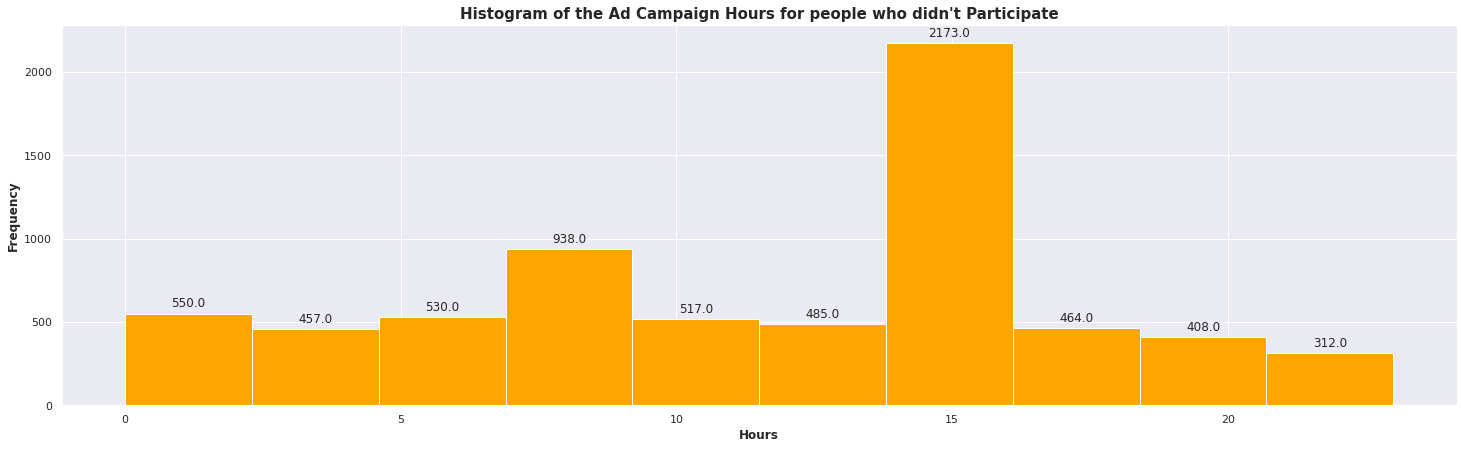

In [97]:
hour_plot = nparticipated_df.hour.plot(kind='hist', color='orange', figsize=(25,7))

#getting the values of the data
pl.get_value(hour_plot)

#set the figure parameters
pl.fig_att(hour_plot, 'Histogram of the Ad Campaign Hours for people who didn\'t Participate', 
        'Hours', 'Frequency', 15, 12, 'bold')

>> #### Time distribution for the AD campaign for those who participated

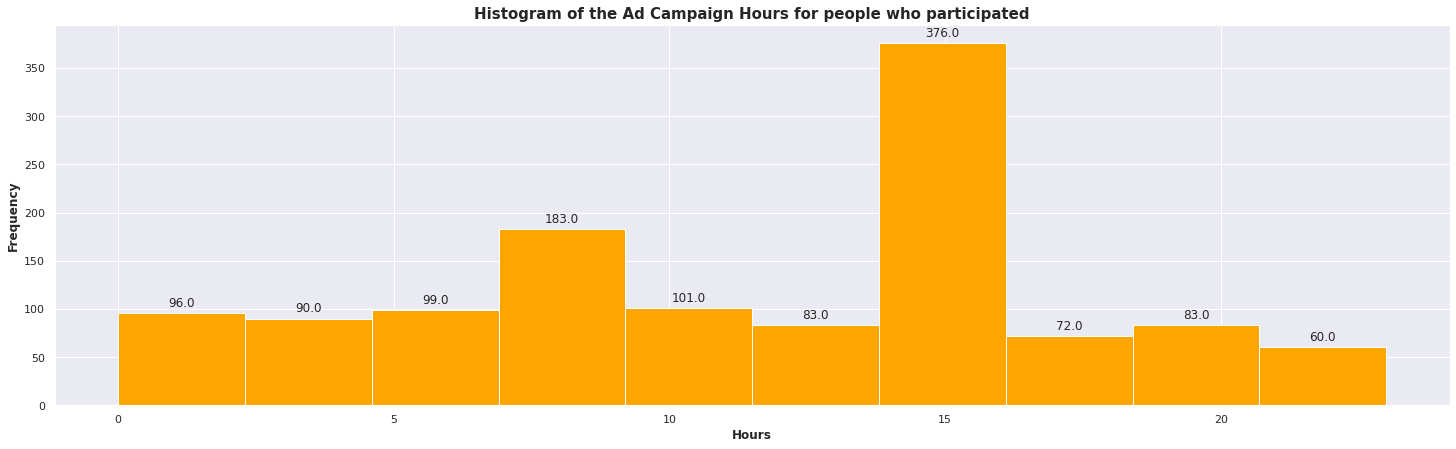

In [98]:
hour_plot = participated_df.hour.plot(kind='hist', color='orange', figsize=(25,7))

#getting the values of the data
pl.get_value(hour_plot)

#set the figure parameters
pl.fig_att(hour_plot, 'Histogram of the Ad Campaign Hours for people who participated', 
        'Hours', 'Frequency', 15, 12, 'bold')

Time distribution for the AD campaign is similar for those who did not participate and those who participated.

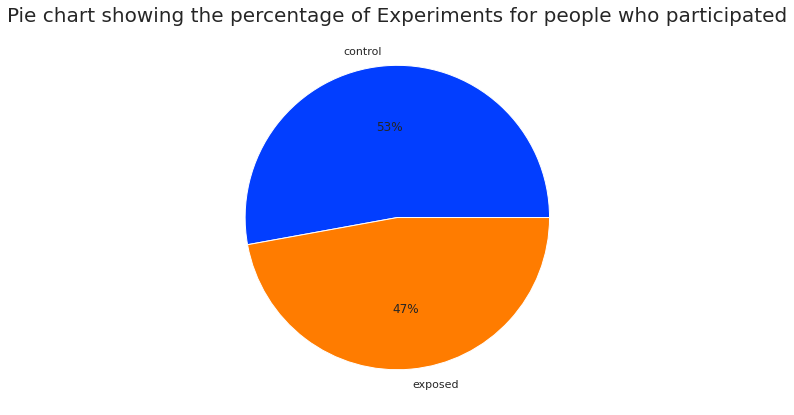

In [61]:
#pie chart showing the prcentage of the experiment carried out
pl.plot_pie(participated_df[['experiment']].value_counts(), ['control','exposed'], "Pie chart showing the percentage of Experiments for people who participated")

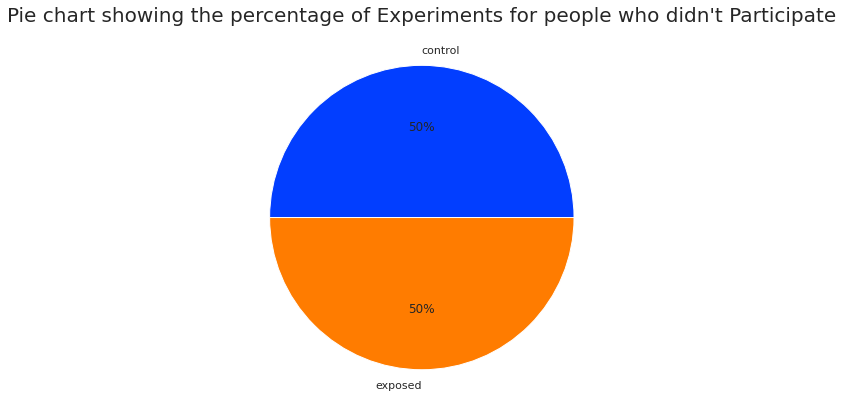

In [99]:
pl.plot_pie(nparticipated_df[['experiment']].value_counts().value_counts(), ['control','exposed'], "Pie chart showing the percentage of Experiments for people who didn't Participate")

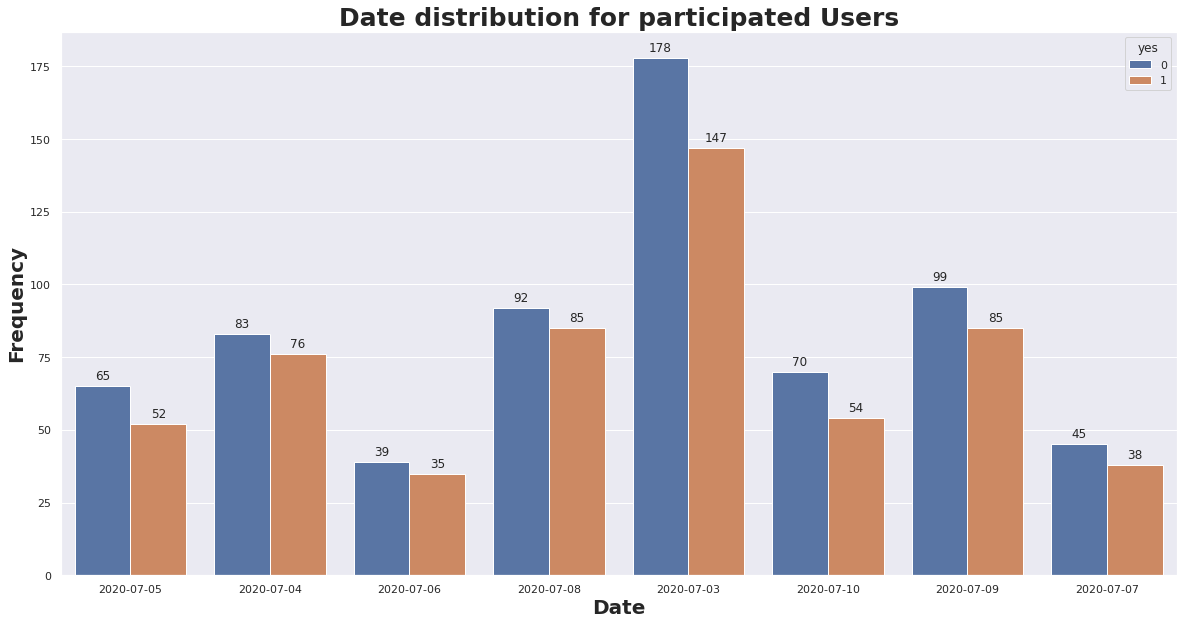

In [113]:
# Date distribution for the AD
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="date", palette='deep', data=participated_df, hue='yes', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Date distribution for participated Users", 
        "Date", "Frequency", 25, 20, "bold")

Date distribution of the AD campaign for thos who did not participate

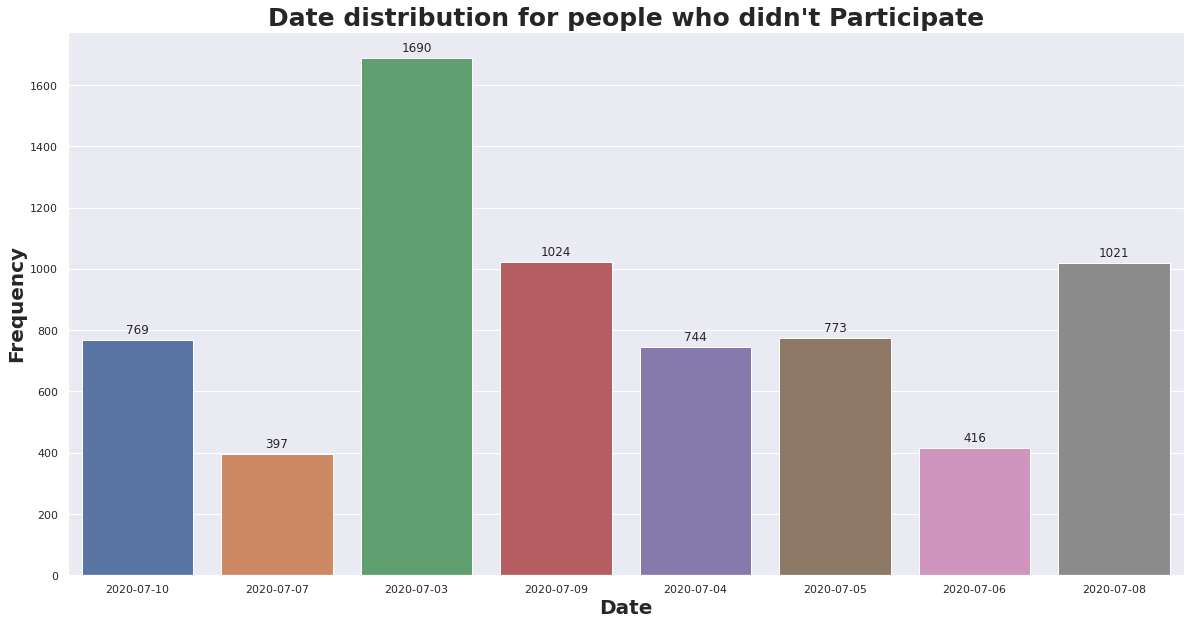

In [115]:
# Date distribution for the AD
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="date", palette='deep', data=nparticipated_df )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Date distribution for people who didn't Participate", 
        "Date", "Frequency", 25, 20, "bold")

Date distribution of the AD campaign for thos who participated based on treatment grouo

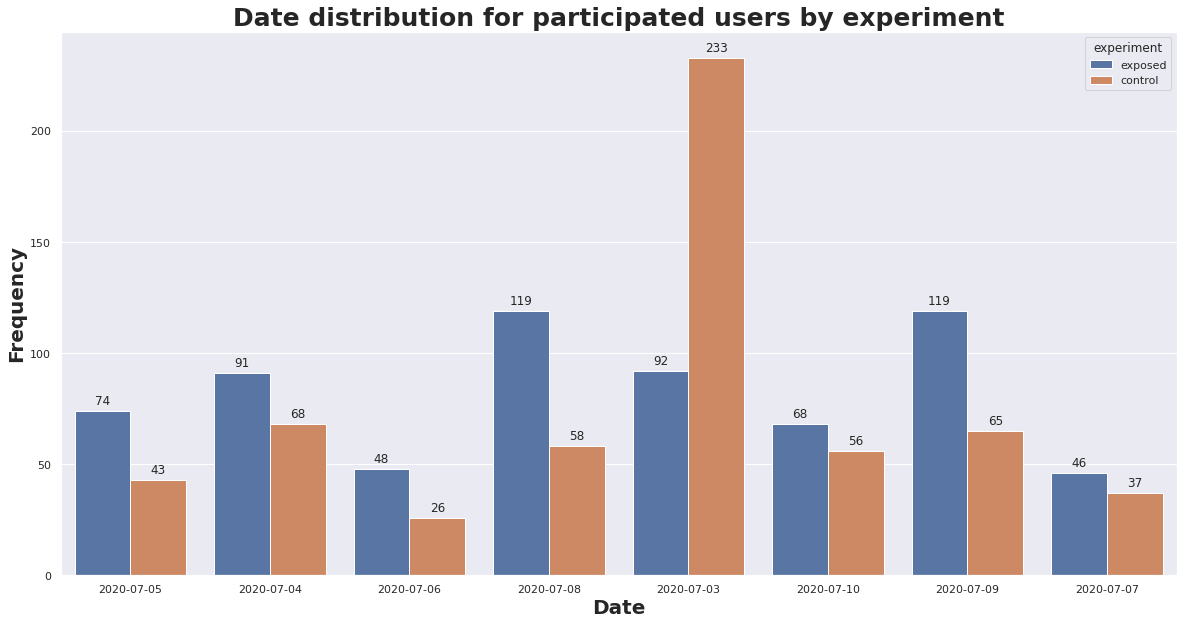

In [117]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="date", palette='deep', data=participated_df, hue='experiment', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Date distribution for participated users by experiment", 
        "Date", "Frequency", 25, 20, "bold")

plt.savefig('../assets/date_exp.png') #to save the figure
plt.show()


It can be seen that most of the reponse is on 03/07/2020 and most of them said no on each day.

In [70]:
df['platform_os'].value_counts()

6    7648
5     428
7       1
Name: platform_os, dtype: int64

In [69]:
participated_df['platform_os'].value_counts()

6    1226
5      17
Name: platform_os, dtype: int64

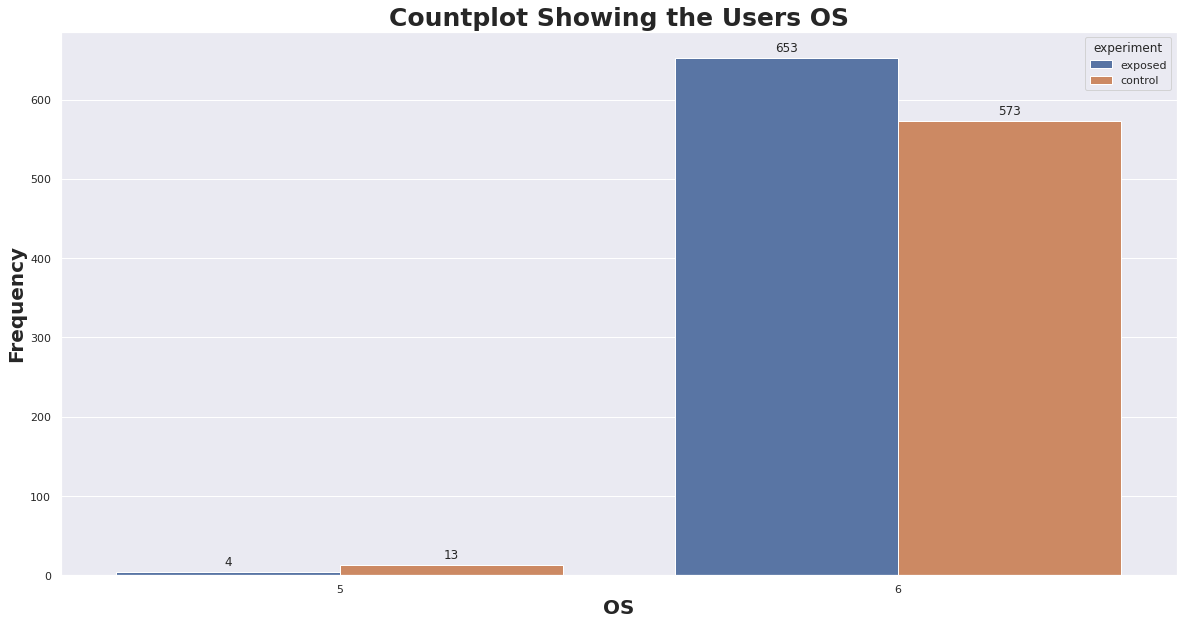

In [104]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="platform_os", palette='deep', data=participated_df, hue='experiment', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users OS", 
        "OS", "Frequency", 25, 20, "bold")

One of the OS is not represented among the participant,



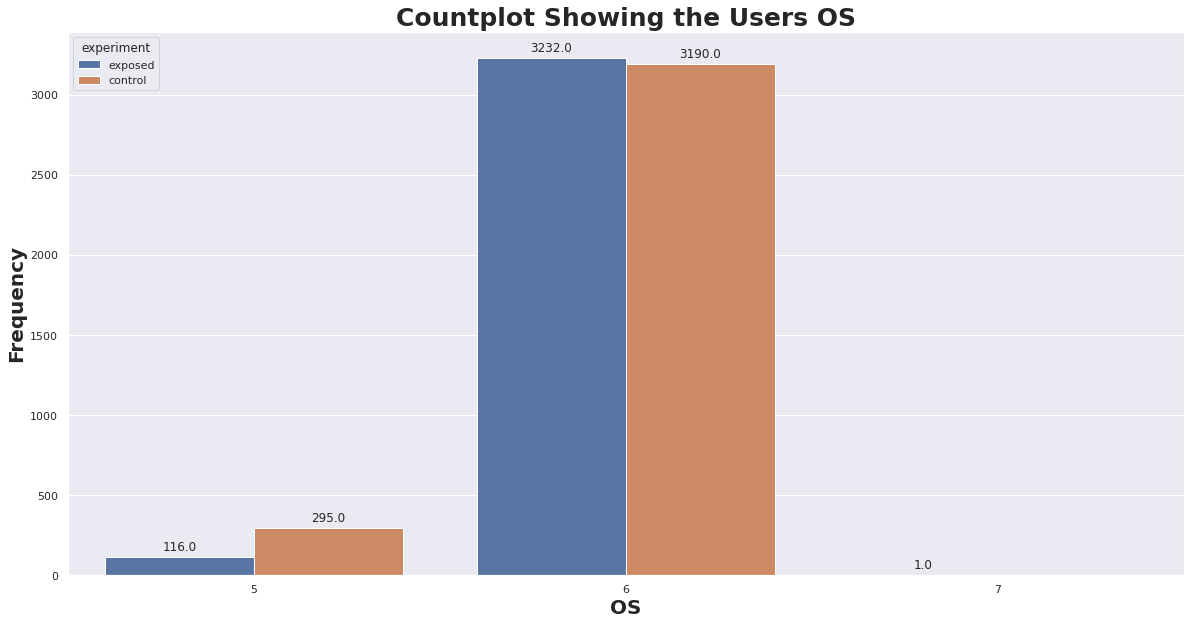

In [105]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="platform_os", palette='deep', data=nparticipated_df, hue='experiment', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users OS", 
        "OS", "Frequency", 25, 20, "bold")

Plot showing participant and non participant Operating System distribution¶


In [121]:
# Browser list for all users
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

In [122]:
# Browser list for participated users
participated_df['browser'].value_counts()

Chrome Mobile                 695
Chrome Mobile WebView         227
Facebook                      156
Samsung Internet              145
Mobile Safari                  14
Mobile Safari UI/WKWebView      3
Chrome                          2
Chrome Mobile iOS               1
Name: browser, dtype: int64

In [ ]:
# Browser list for users
participated_df['browser'].value_counts()

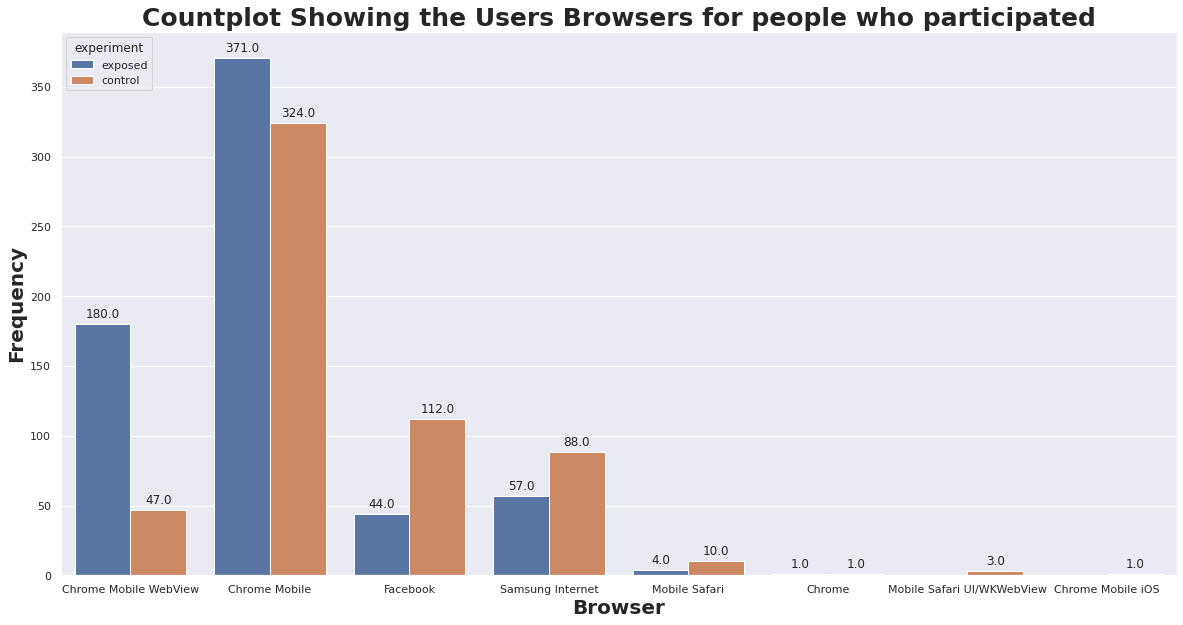

In [109]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="browser", palette='deep', data=participated_df, hue='experiment', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users Browsers for people who participated", 
        "Browser", "Frequency", 25, 20, "bold")

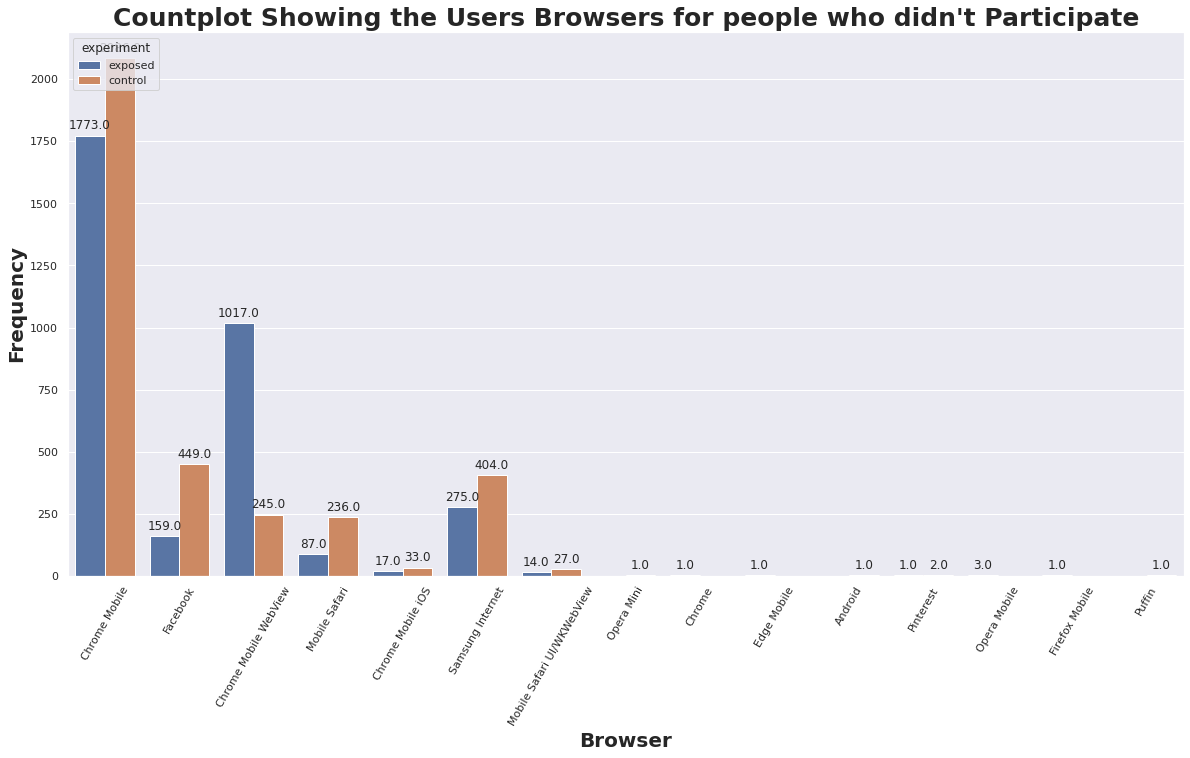

In [111]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="browser", palette='deep', data=nparticipated_df, hue='experiment', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users Browsers for people who didn't Participate", 
        "Browser", "Frequency", 25, 20, "bold")
pl.rotate(ax, 60)

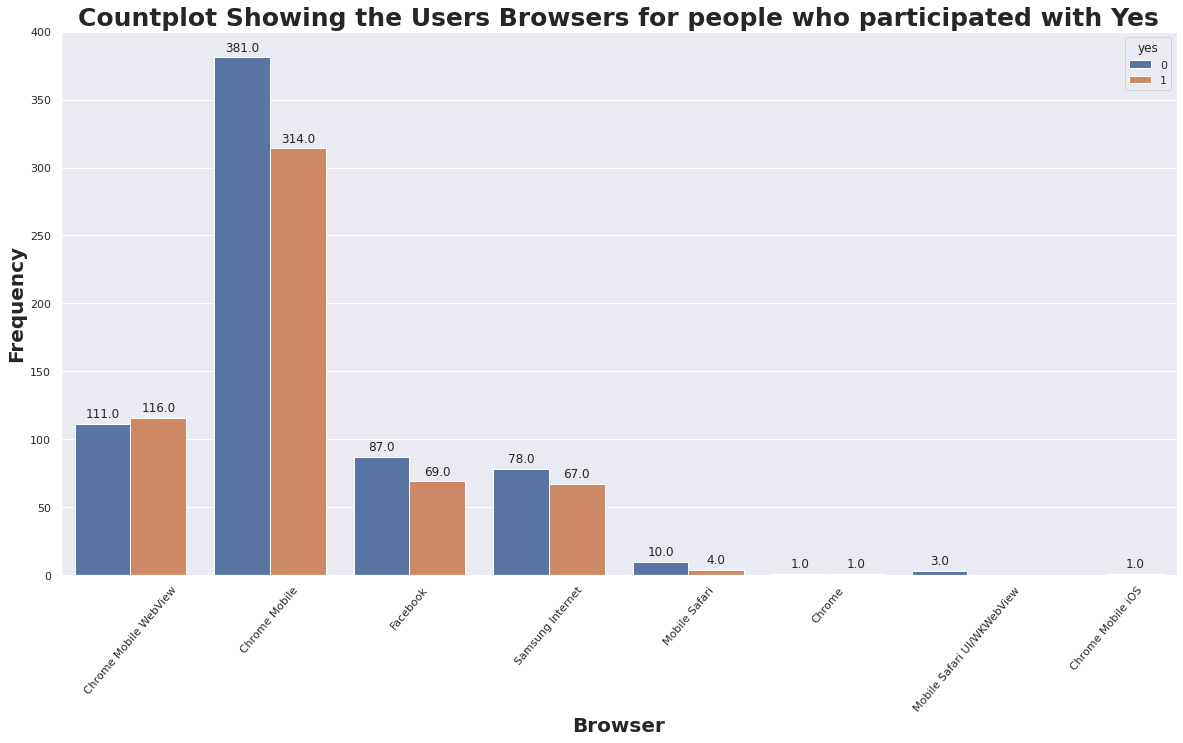

In [112]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="browser", palette='deep', data=participated_df, hue='yes', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users Browsers for people who participated with Yes", 
        "Browser", "Frequency", 25, 20, "bold")
pl.rotate(ax, 50)

In [10]:
df[(df['experiment'] == 'control') & (df['yes'] == 1)].shape[0]

264

In [11]:
df[(df['experiment'] == 'control') & (df['no'] == 1)].shape[0]

322

>> #### Frequentist Approach

In [13]:
# Experiment 1:

control_conversion = df[(df['experiment'] == 'control') & (df['yes'] == 1)].shape[0] / df[(df['experiment'] == 'control')].shape[0]
treatment_conversion = df[(df['experiment'] == 'exposed') & (df['yes'] == 1)].shape[0] / df[(df['experiment'] == 'exposed')].shape[0]
lift = (treatment_conversion - control_conversion)


print(f"control conversion percentage: {round(control_conversion * 100, 2)}%")
print(f"Treatment conversion percentage: {round(treatment_conversion * 100, 2)}%")
print(f"Lift percentage: {round(lift * 100, 2)}%")

control conversion percentage: 6.48%
Treatment conversion percentage: 7.69%
Lift percentage: 1.2%


### CHI-Squared Test
                     
            H0: there is no difference in brand awareness between the exposed and control groups
            H1: there is a difference in brand awareness between the exposed and control groups

In [14]:
# Create Contngency Table for chi square test
control_converted = df[(df['experiment'] == 'control') & (df['yes'] == 1)].shape[0]
treatment_converted = df[(df['experiment'] == 'exposed') & (df['yes'] == 1)].shape[0]
control_non_converted = df[(df['experiment'] == 'control') & (df['no'] == 1)].shape[0]
treatment_not_converted = df[(df['experiment'] == 'exposed') & (df['no'] == 1)].shape[0]

contingency_table = np.array([[control_converted, control_non_converted], [treatment_converted,         treatment_not_converted]])

In [15]:
contingency_table

array([[264, 322],
       [308, 349]])

In [16]:
chi, p_value, _, _ = chi2_contingency(contingency_table, correction=False)

In [43]:
chi, p_value

(0.41690289642162887, 0.518486498219898)

Since the p_value > 0.05, we cannot reject null hypothesis. Hence, we cannot conclude if there exists a relationship between the control and treatment groups.



In [44]:
print(f"{round(p_value * 100, 2)}% probability that a more extreme chi square than {round(chi, 3)} would have occured by chance")

51.85% probability that a more extreme chi square than 0.417 would have occured by chance


<AxesSubplot:xlabel='yes', ylabel='count'>

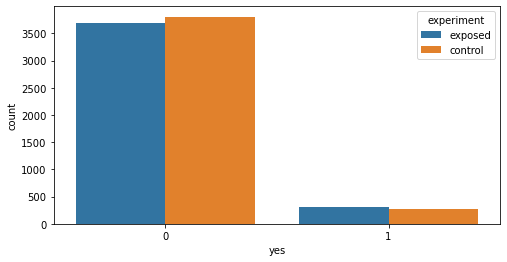

<AxesSubplot:xlabel='no', ylabel='count'>

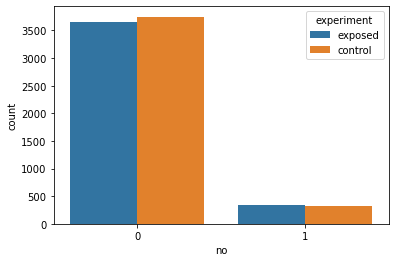

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(df.no, hue=df.experiment)

In [43]:
# Explore the attributes of the data
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [46]:
# concise summary about dataset
df.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [47]:
# Basic Statistical details
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


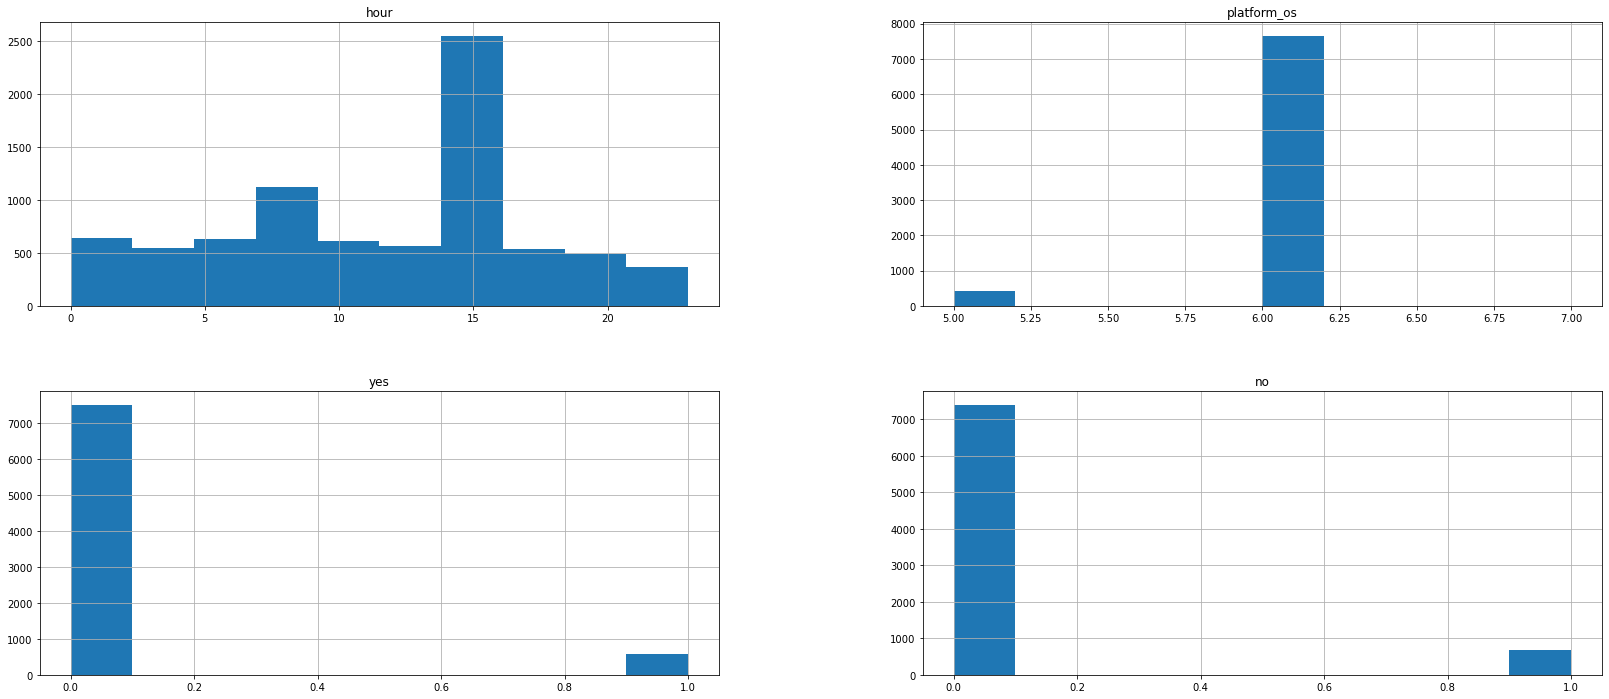

In [52]:
# Visualize the data
df.hist(bins=10, figsize=(28,12))
plt.show()

In [21]:
df['device_make'].value_counts().shape
# 270 different devices

(270,)

In [23]:
df['platform_os'].value_counts()


6    7648
5     428
7       1
Name: platform_os, dtype: int64

In [24]:
df['browser'].value_counts()


Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

In [11]:
df[(df['yes'] == 0) & (df['no'] == 0)].shape
# df['yes'].value_counts()

(6834, 9)

<AxesSubplot:>

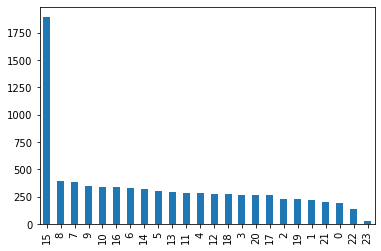

In [41]:
df.hour.value_counts().plot(kind='bar')

In [8]:
df.experiment.value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

<AxesSubplot:>

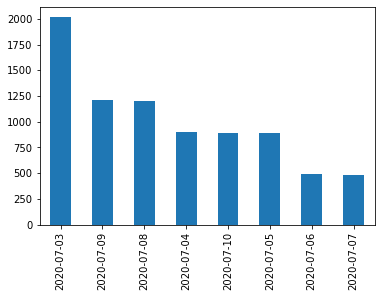

In [10]:
df.date.value_counts().plot(kind='bar')

In [13]:
df.shape

(8077, 9)

In [18]:
df.groupby('auction_id').count()

,experiment,date,hour,device_make,platform_os,browser,yes,no
auction_id,,,,,,,,
0008ef63-77a7-448b-bd1e-075f42c55e39,1,1,1,1,1,1,1,1
000eabc5-17ce-4137-8efe-44734d914446,1,1,1,1,1,1,1,1
0016d14a-ae18-4a02-a204-6ba53b52f2ed,1,1,1,1,1,1,1,1
00187412-2932-4542-a8ef-3633901c98d9,1,1,1,1,1,1,1,1
001a7785-d3fe-4e11-a344-c8735acacc2c,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
ffea24ec-cec1-43fb-b1d1-8f93828c2be2,1,1,1,1,1,1,1,1
ffea3210-2c3e-426f-a77d-0aa72e73b20f,1,1,1,1,1,1,1,1
ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,1,1,1,1,1,1,1,1


In [28]:
df[df['yes'] == 0].shape

(7505, 9)

In [29]:
df[df['yes'] == 1].shape

(572, 9)

In [30]:
df[df['no'] == 1].shape

(671, 9)

In [31]:
df[df['no'] == 0].shape

(7406, 9)